In [8]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns


In [2]:
df=pd.read_csv("/datasets/project_sql_result_01.csv")
df_pj=pd.read_csv("/datasets/project_sql_result_04.csv")

In [3]:
df.info()
df_pj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
top_10_neighborhoods = df_pj.sort_values(by="average_trips", ascending=False).head(10)

print("Top 10 barrios por finalización del recorrido:")
print(top_10_neighborhoods)

Top 10 barrios por finalización del recorrido:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


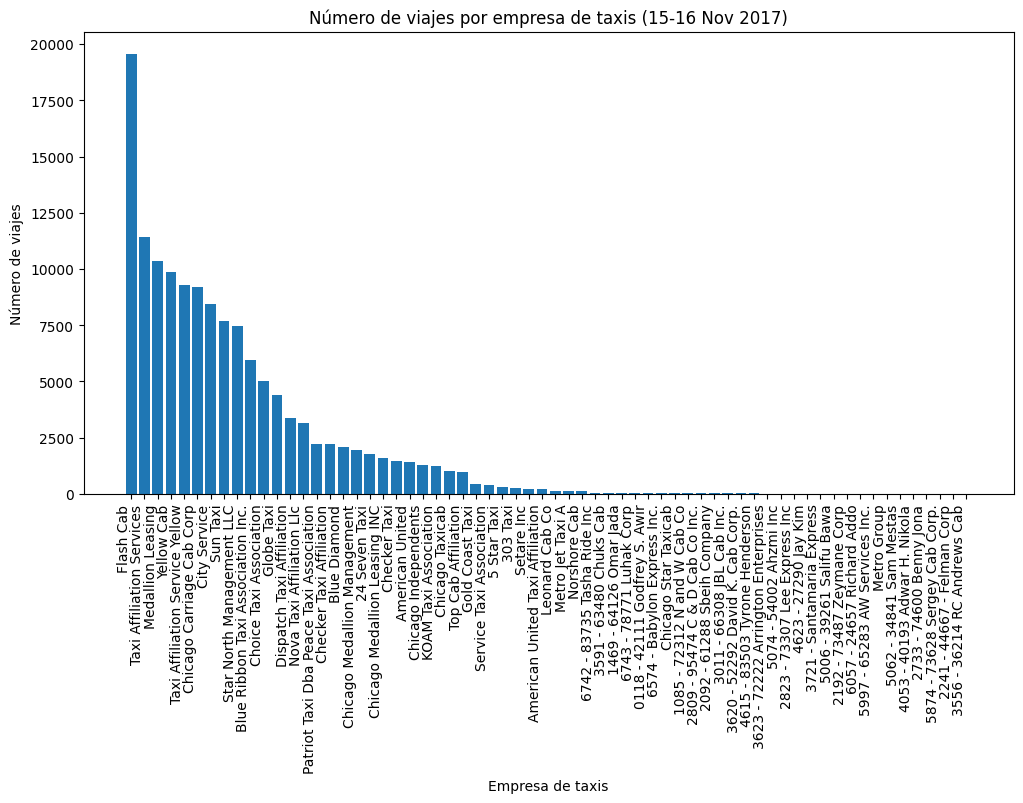

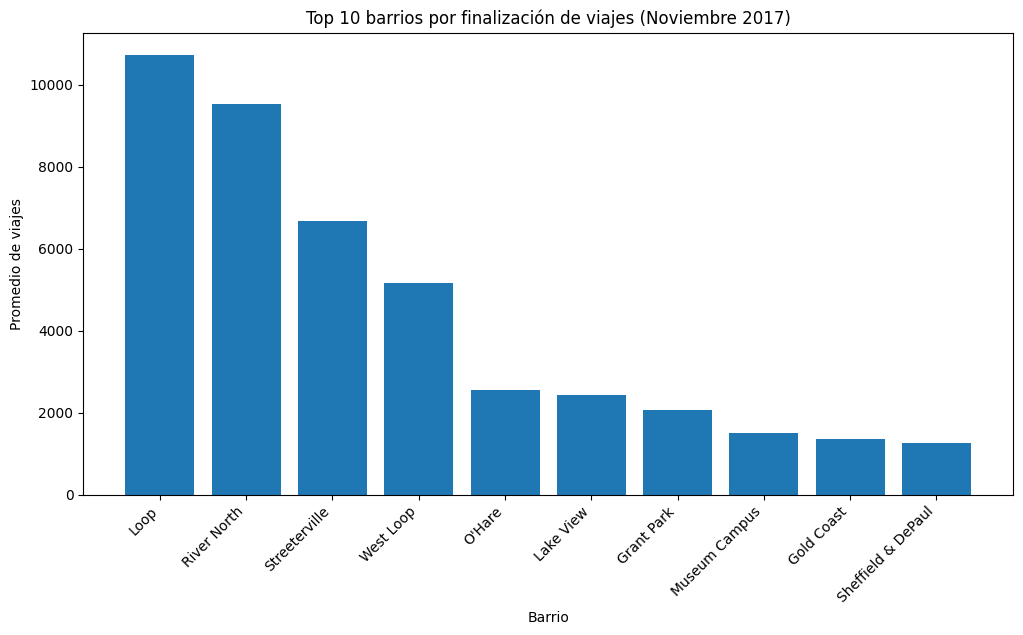

In [5]:
plt.figure(figsize=(12,6))

plt.bar(df["company_name"], df["trips_amount"])
plt.title("Número de viajes por empresa de taxis (15-16 Nov 2017)")
plt.xlabel("Empresa de taxis")
plt.ylabel("Número de viajes")
plt.xticks(rotation=90, ha="right")

plt.show()


# ===== GRÁFICO 2: Los 10 barrios principales por finalización del recorrido =====
top10 = df_pj.sort_values(by="average_trips", ascending=False).head(10)

plt.figure(figsize=(12,6))

plt.bar(top10["dropoff_location_name"], top10["average_trips"])
plt.title("Top 10 barrios por finalización de viajes (Noviembre 2017)")
plt.xlabel("Barrio")
plt.ylabel("Promedio de viajes")
plt.xticks(rotation=45, ha="right")

plt.show()

Flash Cab, Taxi Affiliation Services y Medallion Leasing  dominan claramente el mercado. con este primero siendo claramente el mas dominante, teniendo muchas mas ventas que todos los demas, El barrio Loop es donde más viajes finalizan con gran diferencia,O’Hare aparece en el Top 10  Aunque está lejos del centro, el aeropuerto genera muchísimos viajes finalizados allí. 

In [7]:
from scipy import stats
df = pd.read_csv("/datasets/project_sql_result_07.csv")

df["start_ts"] = pd.to_datetime(df["start_ts"])
df["weekday"] = df["start_ts"].dt.day_name()
saturday_df = df[df["weekday"] == "Saturday"]


saturday_df["is_rain"] = saturday_df["weather_conditions"] == "Bad"


rain = saturday_df[saturday_df["is_rain"] == True]["duration_seconds"]
no_rain = saturday_df[saturday_df["is_rain"] == False]["duration_seconds"]

print("Tamaño lluvia:", len(rain))
print("Tamaño no lluvia:", len(no_rain))


alpha = 0.05
stat, p_value = stats.ttest_ind(rain, no_rain, equal_var=False)

print("t-statistic:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Rechazamos H0: la duración sí cambia los sábados con clima adverso.")
else:
    print("No se puede rechazar H0: no hay evidencia de cambio.")


Tamaño lluvia: 180
Tamaño no lluvia: 888
t-statistic: 7.186034288068629
p-value: 6.738994326108734e-12
Rechazamos H0: la duración sí cambia los sábados con clima adverso.


se utilizan dos medias, duracion de viajes con sabados lluviosos y  duracion de viajes con sabados sin lluvia por lo tanto las hipotesis se formaron en base a eso, si la duracion promedio no cambiaba entonces no se rechaza nuestra hipotesis nula, en cambio si esta si cambiaba significativamente entonces nuestra hipotesis alternativa es la que se toma en cuenta
